<a href="https://colab.research.google.com/github/hasobi/skripsi/blob/master/plot_pdf_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialization

In [0]:
import pandas as pd
import numpy as np

In [0]:
import scipy.stats
from scipy.stats import norm

In [0]:
from matplotlib import pyplot as plt
import seaborn as sns

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df =  pd.read_csv('/content/drive/My Drive/Tugas Akhir a.k.a SKRIPSI/dataset/KDDTrain+_v1.csv')

In [0]:
data = df

In [0]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,num_packet,type_attack
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,15,normal
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,19,neptune
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,21,normal
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,21,normal
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,21,neptune


In [0]:
# create dictionary to classify DoS, Probe, U2R, R2L, or normal connection

attack_dict={ #DOS
    'back' : 'dos',
    'land' : 'dos',
    'neptune' : 'dos',
    'pod' : 'dos',
    'smurf' : 'dos',
    'teardrop' : 'dos',
    'apache2' : 'dos',
    'udpstorm' : 'dos',
    'processtable' : 'dos',
    'worm' : 'dos',
    'mailbomb' : 'dos',
    
    #probe
    'satan' : 'probe',
    'ipsweep' : 'probe',
    'nmap' : 'probe',
    'portsweep' : 'probe',
    'mscan' : 'probe',
    'saint' : 'probe',
    
    #R2L
    'guess_passwd' : 'r2l',
    'ftp_write' : 'r2l',
    'imap' : 'r2l',
    'phf' : 'r2l',
    'multihop' : 'r2l',
    'warezmaster' : 'r2l',
    'warezclient' : 'r2l',
    'spy' : 'r2l',
    'xlock' : 'r2l',
    'xsnoop': 'r2l',
    'snmpguess' : 'r2l',
    'snmpgetattack' : 'r2l',
    'httptunnel' : 'r2l',
    'sendmail' : 'r2l',
    'named' : 'r2l',
    
    #U2R
    'buffer_overflow' : 'u2r',
    'loadmodule' : 'u2r',
    'rootkit' : 'u2r',
    'perl' : 'u2r',
    'sqlattack' : 'u2r',
    'xterm' : 'u2r',
    'ps' : 'u2r'
}

data.replace(attack_dict, inplace = True)

In [0]:
data['number'] = range(1, len(df) + 1)

In [0]:
duration = data['duration']
attack = data['type_attack']
number = data['number']

In [0]:
data_all = pd.concat([duration, attack,number], axis = 1)
# data_all.head()

In [0]:
data_normal = data_all[data.type_attack == 'normal']
data_dos = data_all[data.type_attack == 'dos']
data_probe = data_all[data.type_attack == 'probe']
data_u2r = data_all[data.type_attack == 'u2r']
data_r2l = data_all[data.type_attack == 'r2l']

In [0]:
# sort data
sort_normal_duration = data_normal.sort_values('duration', ascending=True)
sort_dos_duration = data_dos.sort_values('duration', ascending=True)
sort_probe_duration = data_probe.sort_values('duration', ascending=True)
sort_u2r_duration = data_u2r.sort_values('duration', ascending=True)
sort_r2l_duration = data_r2l.sort_values('duration', ascending=True)

In [0]:
s = sort_normal_duration['duration']
a = sort_dos_duration['duration']
b = sort_probe_duration['duration']
c = sort_u2r_duration['duration']
d = sort_r2l_duration['duration']

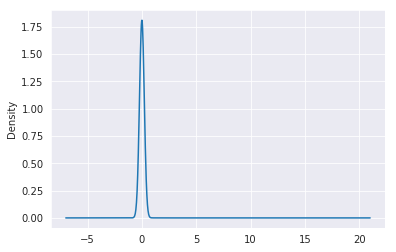

In [0]:
# ax = s.plot.kde()
ax = a.plot.kde(bw_method=0.9)

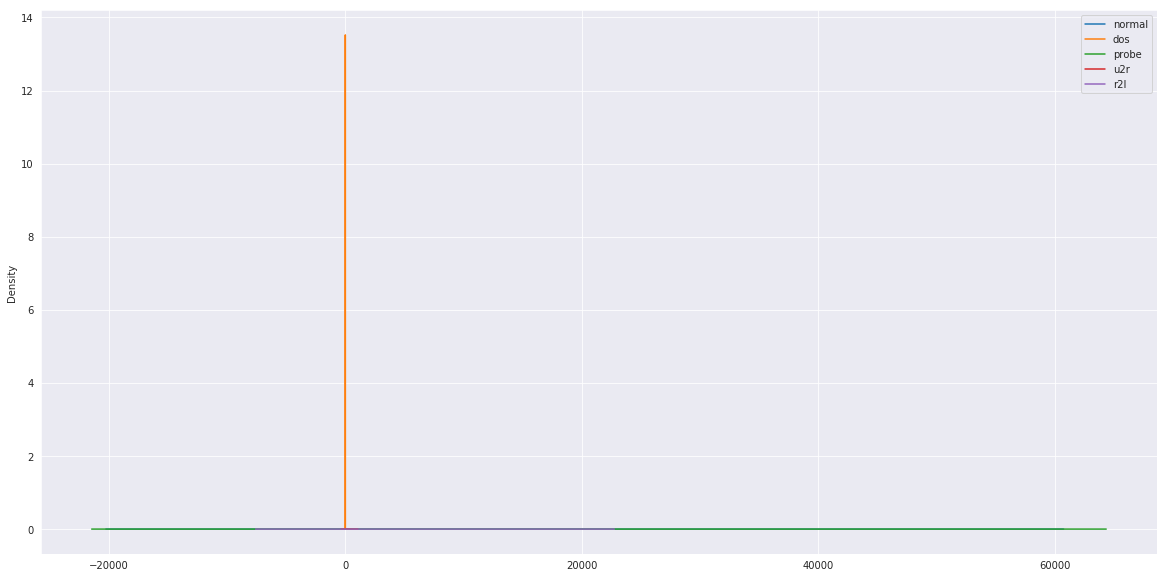

In [0]:
df = pd.DataFrame({
    'normal': s,
    'dos': a,
    'probe' : b,
    'u2r' : c,
    'r2l' : d
})

ax = df.plot.kde(figsize=(20, 10))
# fig, ax = plt.subplots(figsize=(20, 10))


# Histogram

In [0]:
data_all.head()


,duration,type_attack,number
0,0,normal,1
1,0,dos,2
2,0,normal,3
3,0,normal,4
4,0,dos,5


In [0]:
s = sort_normal_duration['duration']
a = sort_dos_duration['duration']
b = sort_probe_duration['duration']
c = sort_u2r_duration['duration']
d = sort_r2l_duration['duration']

s.tail()

51173     29505
103934    32442
49395     32527
119826    32637
49339     40504
Name: duration, dtype: int64

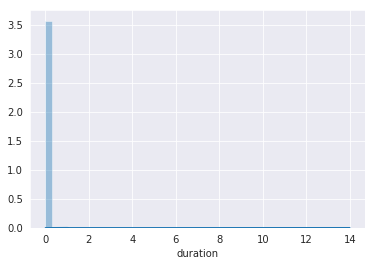

In [0]:
sns.set_style('darkgrid')
sns.distplot(a)

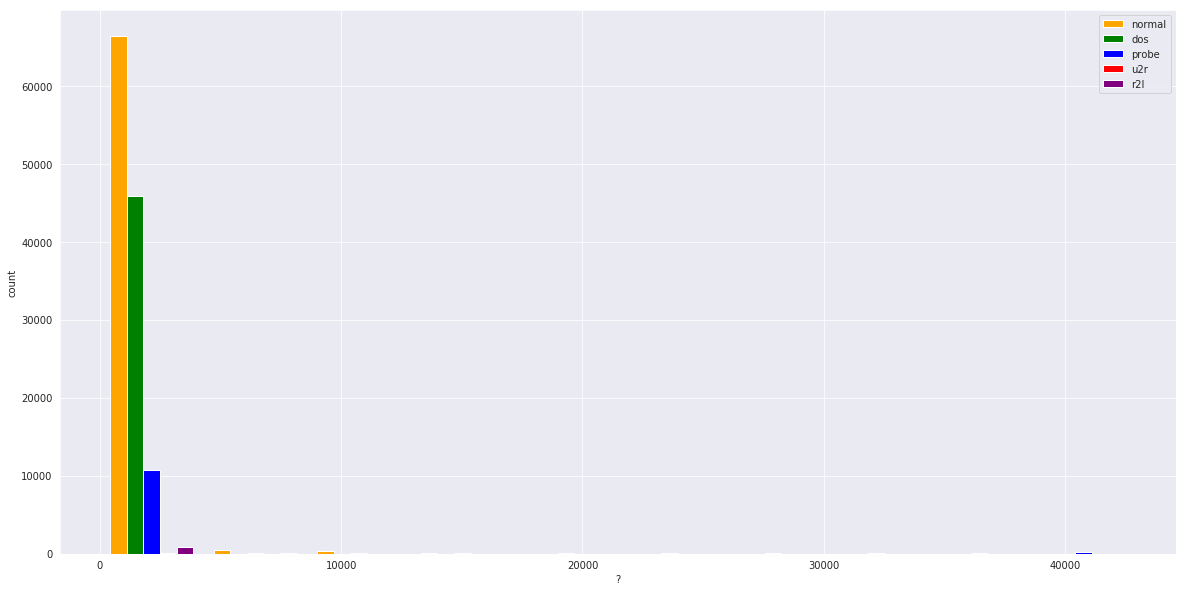

In [0]:
plt.figure(figsize=(20,10))

legend = ['normal','dos','probe','u2r','r2l']
plt.hist([s,a,b,c,d], color=['orange', 'green','blue','red','purple'])
plt.xlabel("?")
plt.ylabel("count")
# plt.xticks(range(0, 7))
# plt.yticks(range(1, 20))
plt.legend(legend)

plt.show()

In [0]:
s1= norm.pdf(s)
a1= norm.pdf(a)
b1= norm.pdf(b)
c1= norm.pdf(c)
d1= norm.pdf(d)

In [0]:
s.head()

0        0
81578    0
81581    0
81582    0
81583    0
Name: duration, dtype: int64

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


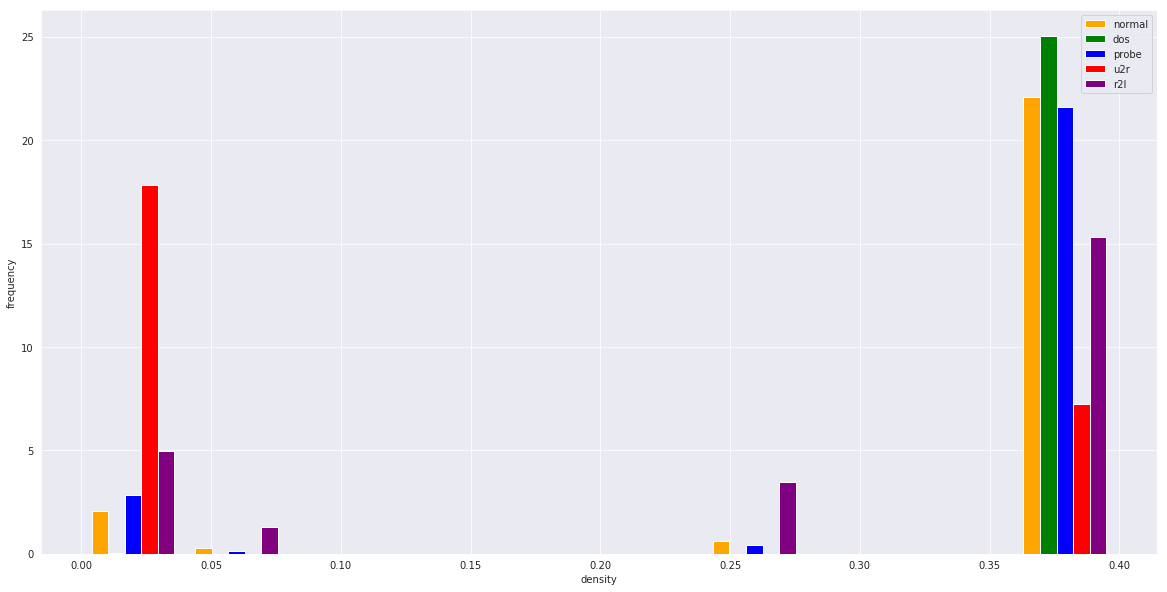

In [0]:
plt.figure(figsize=(20,10))

legend = ['normal','dos','probe','u2r','r2l']
plt.hist([s1,a1,b1,c1,d1], normed= True, color=['orange', 'green','blue','red','purple'])
plt.xlabel("density")
plt.ylabel("frequency")
# plt.xticks(range(0, 7))
# plt.yticks(range(1, 20))
plt.legend(legend)

plt.show()

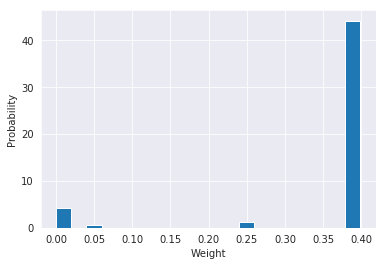

In [0]:
plt.hist(s1,density=1, bins=20) 
# plt.axis([50, 110, 0, 0.06]) 
#axis([xmin,xmax,ymin,ymax])
plt.xlabel('Weight')
plt.ylabel('Probability')

plt.show()